# Import package

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Import linear algebra and data manipulation
import numpy as np
import pandas as pd

#Import plotting packages
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
plt.style.use('fivethirtyeight')

#Import common utilities
import math
from collections import Counter

# statsmodels
import pylab
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels as statm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

#Import machine learning
# Predictive Model
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import Imputer
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import Imputer
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor  
from sklearn.ensemble import RandomForestRegressor
import xgboost 

# Accuracy Evaluation
from sklearn.model_selection import train_test_split #split
from sklearn.metrics import r2_score, mean_squared_error #metrics
import sklearn.metrics as metrics
from sklearn.grid_search import GridSearchCV
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.model_selection import cross_val_score

# NLP
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
import string
import nltk
import re
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Configuration

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 505)

# Importing data

In [5]:
listings_df = pd.read_csv('C:\\DataScience\\00_AnalysisProjects\\AirbnbAnalysis\\Data\\seattle_listings.csv', sep=',')
listings_df.shape

(3818, 92)

# Data Preparation

## Numerical features

### Convert columns from string to numeric values

In [6]:
listings_df['price'] = listings_df['price'].str.replace("[$, ]", "").astype("float")
listings_df['cleaning_fee'] = listings_df['cleaning_fee'].str.replace("[$, ]", "").astype("float")
listings_df['extra_people'] = listings_df['extra_people'].str.replace("[$, ]", "").astype("float")

### Select numerical features

In [7]:
selected_cols = ['cleaning_fee', 'review_scores_accuracy', 'review_scores_checkin',
       'review_scores_value', 'review_scores_location',
       'review_scores_cleanliness', 'review_scores_communication',
       'review_scores_rating', 'reviews_per_month', 'bathrooms',
       'bedrooms', 'beds', 'latitude', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'minimum_nights', 'maximum_nights',
       'extra_people', 'calculated_host_listings_count', 'longitude',
       'guests_included', 'accommodates', 'price']

In [8]:
data_df = listings_df.copy(deep=True)
data_df = data_df[selected_cols]
data_df.shape

(3818, 26)

### Filling NA values

In [9]:
review_columns = ['review_scores_accuracy', 'review_scores_checkin', 'review_scores_value',
                  'review_scores_location', 'review_scores_cleanliness','review_scores_communication',
                  'review_scores_rating','reviews_per_month', 'cleaning_fee']
for col in review_columns:
    data_df[col].fillna(data_df[col].mean(), inplace=True)

In [10]:
na_columns = ['bathrooms','bedrooms','beds']
for col in na_columns:
    data_df[col].fillna(data_df[col].mode()[0], inplace=True)

In [11]:
data_df.isnull().sum()

cleaning_fee                      0
review_scores_accuracy            0
review_scores_checkin             0
review_scores_value               0
review_scores_location            0
review_scores_cleanliness         0
review_scores_communication       0
review_scores_rating              0
reviews_per_month                 0
bathrooms                         0
bedrooms                          0
beds                              0
latitude                          0
availability_30                   0
availability_60                   0
availability_90                   0
availability_365                  0
number_of_reviews                 0
minimum_nights                    0
maximum_nights                    0
extra_people                      0
calculated_host_listings_count    0
longitude                         0
guests_included                   0
accommodates                      0
price                             0
dtype: int64

### Classify label

In [20]:
mean_price = np.mean(listings_df['price'])
mean_price

127.97616553169199

In [21]:
data_df.loc[data_df['price'] <= mean_price, 'price_group'] = 0
data_df.loc[data_df['price'] > mean_price, 'price_group'] = 1

### Separate features and label

In [22]:
selected_cols = list(data_df.columns.values)
selected_cols = [e for e in selected_cols if e not in ['price_group','price','log_price']]
X_data = data_df.loc[:,selected_cols]
Y_data = data_df.loc[:,'price_group']
X_data.shape

(3818, 25)

### Normalization

In [14]:
def Normalize_Data(df):
    for col in df.columns.values:
        df[col] = df[col].astype(float)
        mean = np.mean(df[col])
        std = np.std(df[col])
        df[col] = df[col].apply(lambda x: (x-mean)/std)
    return df

X_data = Normalize_Data(X_data)
X_data.head()

,cleaning_fee,review_scores_accuracy,review_scores_checkin,review_scores_value,review_scores_location,review_scores_cleanliness,review_scores_communication,review_scores_rating,reviews_per_month,bathrooms,bedrooms,beds,latitude,availability_30,availability_60,availability_90,availability_365,number_of_reviews,minimum_nights,maximum_nights,extra_people,calculated_host_listings_count,longitude,guests_included,accommodates
0,-3.031586e-14,5.726658e-01,3.937630e-01,8.023812e-01,-1.063670e+00,6.112031e-01,3.679779e-01,7.654173e-02,1.195309e+00,-0.438461,-0.348068,-0.645342,0.170240,-0.228908,0.179356,0.379264,0.798601,4.897864,-0.083987,-0.246795,-0.322324,-0.160602,-1.194754,0.249756,0.329029
1,-5.204004e-01,5.726658e-01,3.937630e-01,8.023812e-01,6.831564e-01,6.112031e-01,3.679779e-01,2.426703e-01,-3.595500e-01,-0.438461,-0.348068,-0.645342,0.236078,-0.311063,-1.020585,-1.235563,0.364696,0.550724,-0.022651,-0.410158,-0.606680,0.518255,-1.025923,-0.513098,0.329029
2,5.711680e+00,5.726658e-01,3.937630e-01,8.023812e-01,6.831564e-01,6.112031e-01,3.679779e-01,4.087988e-01,-5.576595e-01,5.500872,4.183643,4.621311,0.017732,-1.296929,-1.320570,-1.206202,-0.195436,-0.058936,0.100020,-0.445801,0.815098,-0.160602,-1.146171,6.352583,3.869138
3,-3.031586e-14,1.119073e-14,-1.049403e-13,1.769432e-13,5.275077e-14,6.363495e-14,-1.304567e-13,-1.487322e-13,-1.439645e-14,-0.438461,-1.480996,0.232433,0.220980,-1.379085,-1.577700,-1.705330,-0.802903,-0.589075,-0.083987,0.204680,-0.606680,-0.330316,-1.139743,-0.513098,-0.176701
4,1.517011e+00,-1.002290e+00,3.937630e-01,-6.624741e-01,-1.063670e+00,-7.666159e-01,3.679779e-01,-4.218439e-01,-7.137458e-01,1.258492,1.917787,1.110209,0.091937,1.085580,0.993601,0.937113,0.948495,0.418189,-0.083987,0.204680,0.246387,-0.330316,-1.240293,3.301169,1.340489


## Add Categorical features

### room_type

In [16]:
room_type = listings_df[['room_type']]
room_dummies = pd.get_dummies(room_type,prefix='roomtype',prefix_sep='_')
room_dummies.head()
X_data = pd.concat((X_data,room_dummies.astype(int)),axis=1)

# Split data into Training set and Test set


In [23]:
X_train, X_test, Y_train, Y_test = train_test_split(X_data,Y_data,test_size=0.3,train_size=0.7,random_state=100)

In [24]:
X_train.shape

(2672, 25)

# Predictive Model

## Logistic Regression

#### Train model

In [26]:
# select a class of model
from sklearn.linear_model import LogisticRegression
# initiate model
lg_model = LogisticRegression()
# train model
lg_model.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

#### Predict label

In [27]:
Y_train_pred = lg_model.predict(X_train)
Y_test_pred = lg_model.predict(X_test)

#### Evaluating model accuracy

Accuracy score

In [53]:
print('Train set: {:.2f}'.format(lg_model.score(X_train, Y_train)))
print('Test set: {:.2f}'.format(lg_model.score(X_test, Y_test)))

Train set: 0.82
Test set: 0.81


Confusion Matrix

In [34]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(Y_test, Y_test_pred)
print(confusion_matrix)

[[681  62]
 [160 243]]


Compute precision, recall, F-measure and support

In [37]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_test_pred))

             precision    recall  f1-score   support

        0.0       0.81      0.92      0.86       743
        1.0       0.80      0.60      0.69       403

avg / total       0.81      0.81      0.80      1146



Roc Curve

In [64]:
# ROC curve
def rocAucCurve(classifier, X_test,Y_test ):
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    
    roc_auc = roc_auc_score(Y_test, classifier.predict(X_test))
    fpr, tpr, thresholds = roc_curve(Y_test, classifier.predict_proba(X_test)[:,1])
    plt.figure()
    plt.plot(fpr, tpr, label='ROC AUC (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()


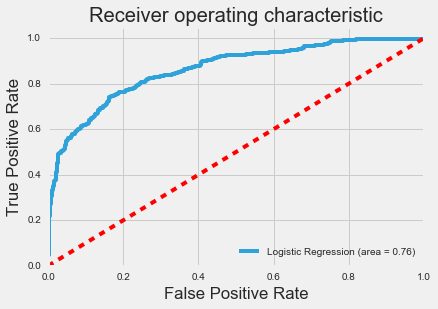

In [40]:
rocAucCurve(lg_model, X_test,Y_test)

In [42]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(Y_test, classifier.predict(X_test))

In [43]:
logit_roc_auc

0.75976608812105717

In [44]:
fpr, tpr, thresholds = roc_curve(Y_test, lg_model.predict_proba(X_test)[:,1])

## Boosting Tree 

#### Train model

In [47]:
# select a class of model
from sklearn.ensemble import GradientBoostingClassifier
# initiate model
gb_model = GradientBoostingClassifier()
# train model
gb_model.fit(X_train, Y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [49]:
# default parameters
gb_model.get_params()

{'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'presort': 'auto',
 'random_state': None,
 'subsample': 1.0,
 'verbose': 0,
 'warm_start': False}

#### Predicting label

In [50]:
Y_train_pred = gb_model.predict(X_train)
Y_test_pred = gb_model.predict(X_test)

#### Evaluating Accuracy

Accuracy Score

In [52]:
print('Train set: {:.2f}'.format(gb_model.score(X_train, Y_train)))
print('Test set: {:.2f}'.format(gb_model.score(X_test, Y_test)))

Train set: 0.88
Test set: 0.84


Confusion Matrix

In [54]:
from sklearn.metrics import confusion_matrix 
confusion_matrix = confusion_matrix(Y_test, Y_test_pred)
print(confusion_matrix)

[[690  53]
 [133 270]]


Compute precision, recall, F-measure and support

In [55]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_test_pred)) 

             precision    recall  f1-score   support

        0.0       0.84      0.93      0.88       743
        1.0       0.84      0.67      0.74       403

avg / total       0.84      0.84      0.83      1146



ROC curve

In [59]:
from sklearn.metrics import roc_auc_score
gb_roc_auc = roc_auc_score(Y_test, gb_model.predict(X_test))
gb_roc_auc

0.79932137501711586

In [ ]:
roc_auc = roc_auc_score(Y_test, classifier.predict(X_test))

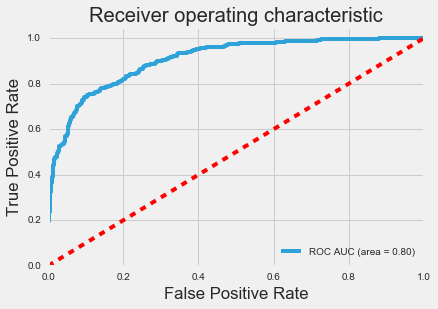

In [66]:
rocAucCurve(gb_model, X_test,Y_test)

#### Tuning Model

In [68]:
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=100, learning_rate = learning_rate, max_features=2, max_depth = 2, random_state = 42)
    gb.fit(X_train, Y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, Y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(X_test, Y_test)))
    print()

Learning rate:  0.05
Accuracy score (training): 0.825
Accuracy score (validation): 0.817

Learning rate:  0.1
Accuracy score (training): 0.832
Accuracy score (validation): 0.825

Learning rate:  0.25
Accuracy score (training): 0.861
Accuracy score (validation): 0.826

Learning rate:  0.5
Accuracy score (training): 0.881
Accuracy score (validation): 0.829

Learning rate:  0.75
Accuracy score (training): 0.898
Accuracy score (validation): 0.833

Learning rate:  1
Accuracy score (training): 0.890
Accuracy score (validation): 0.816



In [ ]:
Use the best parameters

In [69]:
gb_op = GradientBoostingClassifier(n_estimators=100, learning_rate = 0.75, max_features=2, max_depth = 2, random_state = 42)
gb_op.fit(X_train,Y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.75, loss='deviance', max_depth=2,
              max_features=2, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=42, subsample=1.0, verbose=0,
              warm_start=False)

Retrain model

             precision    recall  f1-score   support

        0.0       0.85      0.90      0.88       743
        1.0       0.80      0.71      0.75       403

avg / total       0.83      0.83      0.83      1146



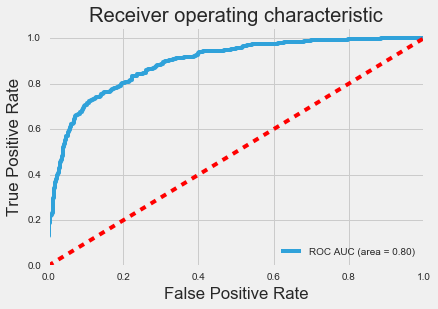

In [70]:
Y_test_pred = gb_op.predict(X_test)  
from sklearn.metrics import confusion_matrix 
confusion_matrix = confusion_matrix(Y_test, Y_test_pred)
print(classification_report(Y_test, Y_test_pred)) 
rocAucCurve(gb_op,X_test,Y_test)

## Random Forest

#### Train model

In [71]:
from sklearn import ensemble
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()  
rf_model.fit(X_train, Y_train) 

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

#### Predicting label

In [72]:
Y_train_pred = rf_model.predict(X_train)
Y_test_pred = rf_model.predict(X_test)  

#### Evaluating model accuracy

Accuracy scores

In [76]:
print('Train set: {:.2f}'.format(rf_model.score(X_train, Y_train)))
print('Test set: {:.2f}'.format(rf_model.score(X_test, Y_test)))

Train set: 0.99
Test set: 0.83


Confusion Matrix

In [77]:
from sklearn.metrics import confusion_matrix  
print(confusion_matrix(Y_test, Y_test_pred))

[[691  52]
 [147 256]]


Compute precision, recall, F-measure and support

In [78]:
from sklearn.metrics import classification_report  
print(classification_report(Y_test, Y_test_pred))  

             precision    recall  f1-score   support

        0.0       0.82      0.93      0.87       743
        1.0       0.83      0.64      0.72       403

avg / total       0.83      0.83      0.82      1146



ROC Curve

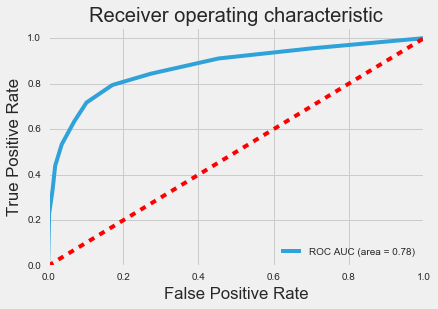

In [79]:
rocAucCurve(rf_model, X_test,Y_test)

#### Hyper parameters Tuning

In [80]:
from sklearn.model_selection import RandomizedSearchCV
from pprint import pprint
from sklearn.model_selection import GridSearchCV
param_grid = {
    'bootstrap': [True],
    'max_depth': [5, 25],
    'max_features': [2, 10],
    'min_samples_leaf': [3, 10],
    'min_samples_split': [2, 10],
    'n_estimators': [100, 200]
}

In [81]:
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 10, n_jobs = 1, verbose = 2)
grid_search.fit(X_train, Y_train)

Fitting 10 folds for each of 32 candidates, totalling 320 fits
[CV] bootstrap=True, max_depth=5, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=True, max_depth=5, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=100, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  bootstrap=True, max_depth=5, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=100, total=   0.1s
[CV] bootstrap=True, max_depth=5, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=True, max_depth=5, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=100, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=True, max_depth=5, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=100, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=True, max_depth=5, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=100, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=True, max_depth=5, max_features=2, min_samples_leaf=

[CV]  bootstrap=True, max_depth=5, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=200, total=   0.2s
[CV] bootstrap=True, max_depth=5, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=5, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=200, total=   0.2s
[CV] bootstrap=True, max_depth=5, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=5, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=200, total=   0.2s
[CV] bootstrap=True, max_depth=5, max_features=2, min_samples_leaf=10, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=True, max_depth=5, max_features=2, min_samples_leaf=10, min_samples_split=2, n_estimators=100, total=   0.0s
[CV] bootstrap=True, max_depth=5, max_features=2, min_samples_leaf=10, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=True, max_depth=5, max_features=2, min_sampl

[CV]  bootstrap=True, max_depth=5, max_features=2, min_samples_leaf=10, min_samples_split=10, n_estimators=200, total=   0.3s
[CV] bootstrap=True, max_depth=5, max_features=2, min_samples_leaf=10, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=5, max_features=2, min_samples_leaf=10, min_samples_split=10, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=5, max_features=2, min_samples_leaf=10, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=5, max_features=2, min_samples_leaf=10, min_samples_split=10, n_estimators=200, total=   0.3s
[CV] bootstrap=True, max_depth=5, max_features=2, min_samples_leaf=10, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=5, max_features=2, min_samples_leaf=10, min_samples_split=10, n_estimators=200, total=   0.3s
[CV] bootstrap=True, max_depth=5, max_features=2, min_samples_leaf=10, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=5, max_features=2, m

[CV]  bootstrap=True, max_depth=5, max_features=10, min_samples_leaf=3, min_samples_split=10, n_estimators=100, total=   0.4s
[CV] bootstrap=True, max_depth=5, max_features=10, min_samples_leaf=3, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=5, max_features=10, min_samples_leaf=3, min_samples_split=10, n_estimators=100, total=   0.3s
[CV] bootstrap=True, max_depth=5, max_features=10, min_samples_leaf=3, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=5, max_features=10, min_samples_leaf=3, min_samples_split=10, n_estimators=100, total=   0.3s
[CV] bootstrap=True, max_depth=5, max_features=10, min_samples_leaf=3, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=5, max_features=10, min_samples_leaf=3, min_samples_split=10, n_estimators=200, total=   0.6s
[CV] bootstrap=True, max_depth=5, max_features=10, min_samples_leaf=3, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=5, max_features=10, 

[CV]  bootstrap=True, max_depth=5, max_features=10, min_samples_leaf=10, min_samples_split=10, n_estimators=100, total=   0.3s
[CV] bootstrap=True, max_depth=5, max_features=10, min_samples_leaf=10, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=5, max_features=10, min_samples_leaf=10, min_samples_split=10, n_estimators=100, total=   0.3s
[CV] bootstrap=True, max_depth=5, max_features=10, min_samples_leaf=10, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=5, max_features=10, min_samples_leaf=10, min_samples_split=10, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=5, max_features=10, min_samples_leaf=10, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=5, max_features=10, min_samples_leaf=10, min_samples_split=10, n_estimators=100, total=   0.2s
[CV] bootstrap=True, max_depth=5, max_features=10, min_samples_leaf=10, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=5, max_featu

[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=200, total=   0.3s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=200, total=   0.3s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=2, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100, total=   0.1s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=3, min_samples_split=10, n_estimators=100 
[CV]  bootstrap=True, max_depth=25, max_features=2, min_s

[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=10, min_samples_split=2, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=10, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=10, min_samples_split=2, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=10, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=10, min_samples_split=2, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=10, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=10, min_samples_split=2, n_estimators=200, total=   0.4s
[CV] bootstrap=True, max_depth=25, max_features=2, min_samples_leaf=10, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=25, max_features=2, 

[CV]  bootstrap=True, max_depth=25, max_features=10, min_samples_leaf=3, min_samples_split=2, n_estimators=100, total=   0.4s
[CV] bootstrap=True, max_depth=25, max_features=10, min_samples_leaf=3, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=True, max_depth=25, max_features=10, min_samples_leaf=3, min_samples_split=2, n_estimators=100, total=   0.4s
[CV] bootstrap=True, max_depth=25, max_features=10, min_samples_leaf=3, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=True, max_depth=25, max_features=10, min_samples_leaf=3, min_samples_split=2, n_estimators=100, total=   0.4s
[CV] bootstrap=True, max_depth=25, max_features=10, min_samples_leaf=3, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=25, max_features=10, min_samples_leaf=3, min_samples_split=2, n_estimators=200, total=   0.9s
[CV] bootstrap=True, max_depth=25, max_features=10, min_samples_leaf=3, min_samples_split=2, n_estimators=200 
[CV]  bootstrap=True, max_depth=25, max_features=10,

[CV]  bootstrap=True, max_depth=25, max_features=10, min_samples_leaf=10, min_samples_split=2, n_estimators=100, total=   0.4s
[CV] bootstrap=True, max_depth=25, max_features=10, min_samples_leaf=10, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=True, max_depth=25, max_features=10, min_samples_leaf=10, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] bootstrap=True, max_depth=25, max_features=10, min_samples_leaf=10, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=True, max_depth=25, max_features=10, min_samples_leaf=10, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] bootstrap=True, max_depth=25, max_features=10, min_samples_leaf=10, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=True, max_depth=25, max_features=10, min_samples_leaf=10, min_samples_split=2, n_estimators=100, total=   0.3s
[CV] bootstrap=True, max_depth=25, max_features=10, min_samples_leaf=10, min_samples_split=2, n_estimators=100 
[CV]  bootstrap=True, max_depth=25, max_feat

[CV]  bootstrap=True, max_depth=25, max_features=10, min_samples_leaf=10, min_samples_split=10, n_estimators=200, total=   1.1s
[CV] bootstrap=True, max_depth=25, max_features=10, min_samples_leaf=10, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=25, max_features=10, min_samples_leaf=10, min_samples_split=10, n_estimators=200, total=   1.0s
[CV] bootstrap=True, max_depth=25, max_features=10, min_samples_leaf=10, min_samples_split=10, n_estimators=200 
[CV]  bootstrap=True, max_depth=25, max_features=10, min_samples_leaf=10, min_samples_split=10, n_estimators=200, total=   1.0s


[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed:  2.7min finished


GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'bootstrap': [True], 'max_depth': [5, 25], 'max_features': [2, 10], 'min_samples_leaf': [3, 10], 'min_samples_split': [2, 10], 'n_estimators': [100, 200]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [82]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 25,
 'max_features': 10,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 200}

[[684  59]
 [134 269]]
             precision    recall  f1-score   support

        0.0       0.84      0.92      0.88       743
        1.0       0.82      0.67      0.74       403

avg / total       0.83      0.83      0.83      1146



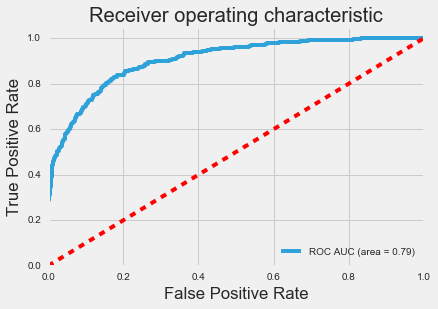

In [83]:
# retrain optimized model
rf_model=RandomForestClassifier(n_estimators=200,max_depth=25, max_features=10,bootstrap=True,min_samples_leaf=3,min_samples_split=2)
rf_model.fit(X_train,Y_train)
Y_train_pred = rf_model.predict(X_train)
Y_test_pred = rf_model.predict(X_test)  
print(confusion_matrix(Y_test, Y_test_pred)) 
print(classification_report(Y_test, Y_test_pred)) 
rocAucCurve(rf_model,X_test,Y_test)

## PCA

In [87]:
# split data into features and label
X_data = data_df.loc[:,selected_cols]
X_data['roomtype_Entire home/apt'] = room_dummies['roomtype_Entire home/apt']
X_data['roomtype_Private room'] = room_dummies['roomtype_Private room']
X_data['roomtype_Shared room'] = room_dummies['roomtype_Shared room']
Y_data = data_df.loc[:,'price']
# standardize the dataset
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X_data)

# call PCA
from sklearn.decomposition import PCA  
pca = PCA(n_components = 28)
pca.fit(X_std)

PCA(copy=True, iterated_power='auto', n_components=28, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [88]:
import time
from sklearn.pipeline import Pipeline

X_train, X_test, y_train, y_test = train_test_split(X_data,
                                                Y_data, 
                                                test_size=0.3,
                                                train_size = 0.7,
                                                random_state=42)
pipe1 = Pipeline([
    ('standardize', StandardScaler()),
    ('pca', PCA(n_components = 17)),
    ('logistic', linear_model.LogisticRegression(C = 1e5))
])
start = time.time()

pipe1.fit(X_train, y_train)
y_pred1 = pipe1.predict(X_test)
end = time.time()
print(end - start)

# pipeline without PCA
pipe2 = Pipeline([
    ('standardize', StandardScaler()),
    ('logistic', linear_model.LogisticRegression(C = 1e5))
])
start = time.time()

pipe2.fit(X_train, y_train)
y_pred2 = pipe2.predict(X_test)
end = time.time()
print(end - start)

6.854382038116455
18.428656578063965


In [89]:
print('Logistic Regression Accuracy with PCA:',sum(y_test == y_pred1)," / ", sum(y_test==y_test) ,'=' , sum(y_test == y_pred1)/sum(y_test==y_test)*100 , "%\n")
print('Logistic Regression Accuracy without PCA:',sum(y_test == y_pred2)," / ", sum(y_test==y_test) ,'=' , sum(y_test == y_pred2)/sum(y_test==y_test)*100 , "%\n")

Logistic Regression Accuracy with PCA: 56  /  1146 = 4.886561954624781 %

Logistic Regression Accuracy without PCA: 53  /  1146 = 4.62478184991274 %



### PCA using Label encoding

In [95]:
import time
from sklearn.pipeline import Pipeline

X_train, X_test, y_train, y_test = train_test_split(X_data,
                                                Y_data, 
                                                test_size=0.3,
                                                train_size = 0.7,
                                                random_state=42)
pipe1 = Pipeline([
    ('standardize', StandardScaler()),
    ('pca', PCA(n_components = 4)),
    ('logistic', linear_model.LogisticRegression(C = 1e5))
])
start = time.time()

pipe1.fit(X_train, y_train)
y_pred1 = pipe1.predict(X_test)
end = time.time()
print(end - start)

# pipeline without PCA
pipe2 = Pipeline([
    ('standardize', StandardScaler()),
    ('logistic', linear_model.LogisticRegression(C = 1e5))
])
start = time.time()

pipe2.fit(X_train, y_train)
y_pred2 = pipe2.predict(X_test)
end = time.time()
print(end - start)

0.7129225730895996
16.61331033706665


In [96]:
print('Logistic Regression Accuracy with PCA:',sum(y_test == y_pred1)," / ", sum(y_test==y_test) ,'=' , sum(y_test == y_pred1)/sum(y_test==y_test)*100 , "%\n")
print('Logistic Regression Accuracy without PCA:',sum(y_test == y_pred2)," / ", sum(y_test==y_test) ,'=' , sum(y_test == y_pred2)/sum(y_test==y_test)*100 , "%\n")

Logistic Regression Accuracy with PCA: 70  /  1146 = 6.108202443280978 %

Logistic Regression Accuracy without PCA: 53  /  1146 = 4.62478184991274 %

